# **¿Qué son los indicadores técnicos?**

### Los indicadores técnicos son fórmulas matemáticas y estadísticas utilizadas para analizar los movimientos de los precios de un activo específico en el mercado financiero. Son herramientas útiles porque ayudan a predecir posibles cambios en las tendencias de los precios con cierta anticipación, permitiendo actuar de manera más racional. Además, ofrecen un resultado visual, ya que se añaden a un gráfico de series temporales, lo que facilita su interpretación.

### Existen varios tipos de indicadores técnicos, que pueden agruparse en las siguientes categorías principales:

* ### Indicadores de tendencia  

* ### Indicadores de volatilidad  

* ### Indicadores de momentum  

### Teniendo esto claro, implementemoslas en un gráfico. En este caso lo haremos usando Python, no obstante, se puede hacer en cualquier herramienta de trading de su preferencia. En este caso, aplicaremos las técnicas en mi empresa favorita: $\text{NVDIA}$. 

### Para el calculo de los índicadores técnicos se va utilizar la libreria ta-lib, la cuál cuenta como muchas funciones para el análisis técnic. Les comparto el siguiente link si gustan descargarlo y echar un vistazo a la documentación: https://ta-lib.org/

## Cargamos librerias que usaremos en este proyecto

In [118]:
# para manipular las fechas
import datetime as dt 

# para manipular los datos
import pandas as pd
import numpy as np

# para descargar los datos de Yahoo Finance
import yfinance as yf

# para visualizar los datos
import matplotlib.pyplot as plt
import seaborn as sns

# para hacer análisis técnico
import talib as ta


[*********************100%***********************]  1 of 1 completed


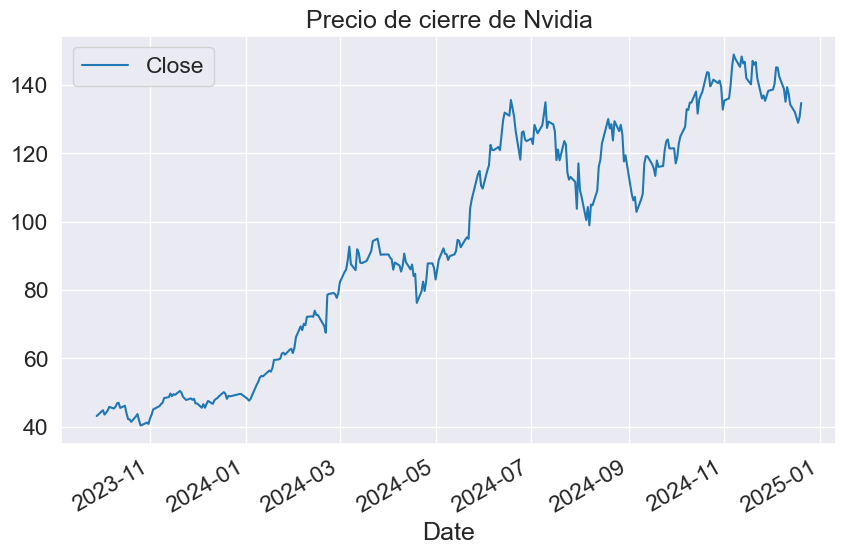

In [119]:
# Descargamos los precios históricos de la acción de Nvidia
end = dt.datetime.now()
start = dt.datetime(2023, 9, 28)
ticker = "NVDA"

nvda = yf.download(ticker, start, end)

# Graficamos el precio de cierre de Nvidia
sns.set_style("darkgrid")
nvda.plot(y="Close", title="Precio de cierre de Nvidia", figsize=(10, 6))
plt.gcf().set_size_inches(10, 6)
plt.show()

## **Indicador de Media Móvil**

### La media móvil se considera uno de los indicadores más utilizados y sencillos en el análisis técnico. Se calcula como el promedio de un conjunto específico de datos, proporcionando una línea suavizada que refleja el movimiento general de los precios. El tipo más común es la **Media Móvil Simple (SMA)**, que corresponde a la media aritmética de los valores.

### **Interpretación**
### La media móvil suaviza las fluctuaciones de los datos, permitiendo identificar con mayor claridad la tendencia de los precios, ya sea alcista o bajista. Esto facilita la toma de decisiones según la situación del mercado.

### **Tipos de Medias Móviles**
### Existen diferentes tipos de medias móviles, entre las cuales destacan:

* ### Media Móvil Ponderada (WMA): Asigna un mayor peso a los datos más recientes, haciéndola más sensible a los cambios recientes en los precios.
* ### Media Móvil Exponencial (EMA): Similar a la WMA, pero utiliza una fórmula que aplica un factor exponencial de ponderación. Esto permite que la EMA reaccione más rápidamente a los movimientos de los precios recientes, siendo especialmente útil en mercados con alta volatilidad.

### No obstante, usaremos solo la Media Móvil Simple (SMA). Matemáticamente la media móvil simple (SMA) se formaliza como sigue: 

$$
\LARGE
\text{SMA} = \frac{1}{n} \sum_{t=1}^{n} P_t
$$

### Dónde:

### ${P}$: Promedio en períodos.
### ${n}$: Cantidad de períodos.
### !Ahora implementemoslo en Python!

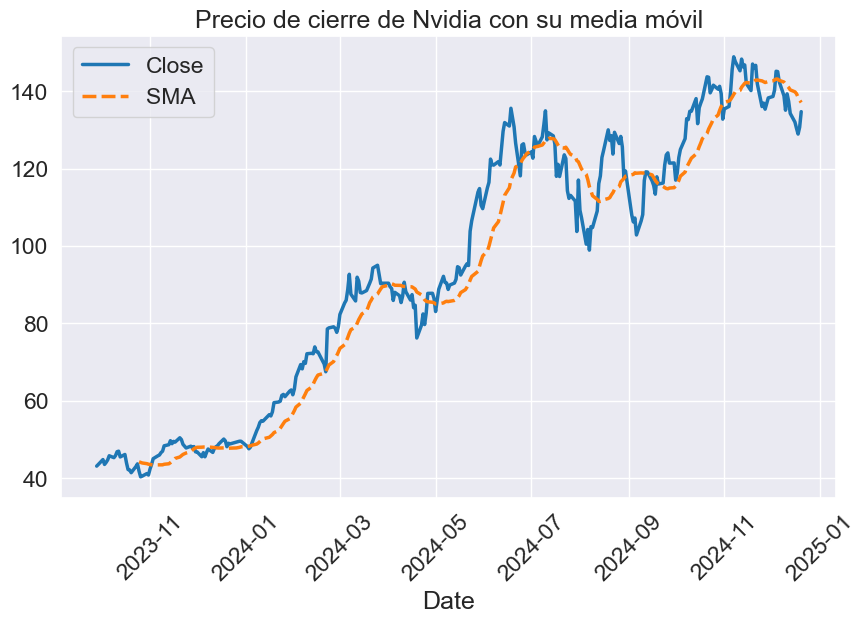

In [120]:
# Cálcular SMA con Talib

nvda["SMA"] = ta.SMA(nvda["Close"], timeperiod = 20)

# Gráficamos el precio de cierre con su respectiva media móvil y ¡Tadam!
sns.lineplot(data=nvda[["Close", "SMA"]],
              linewidth=2.5)
plt.xticks(rotation=45)
plt.title("Precio de cierre de Nvidia con su media móvil")
plt.gcf().set_size_inches(10, 6)


## **Bandas de Bollinger como indicador de volatilidad**

### Deben su nombre a John Bollinger, quien las diseñó (para los interesados en la historia). Se componen de una media móvil simple (SMA) y dos bandas situadas a una distancia determinada, generalmente 2 desviaciones estándar por encima y por debajo de la SMA. Estas bandas reaccionan a los cambios en los precios del activo: se ensanchan en periodos de alta volatilidad y se estrechan en periodos de baja volatilidad.

### **Interpretación**

### Si el precio se encuentra por encima de la banda superior, se considera que el activo está sobrevalorado. Por el contrario, si el precio se sitúa por debajo de la banda inferior, se interpreta que el activo está infravalorado.


### Para calcular las bandas de Bollinger se usan dos fórmulas, la primera para la media móvil simple, por lo que es válida la ecuación antes expuesta, y la ultima de la desviación estándar respecto a la media móvil simple, que es como sigue: 

$$
\LARGE
\text{BBands}_i = {\text{SMA}}\,{\pm}\, \sigma_i * d
$$

### Dónde:

### ${\text{SMA}}$: Media móvil simple.
### ${d}$: Número de desviaciones estándar (usualmente 2).

### De modo que hacemos un cálculo para la banda superior y otra para la inferior.
 
### ¡Momento de implementarlo en Python!

### Haremos el supuesto de que la media móvil simple es de 20 días, o periodos. 

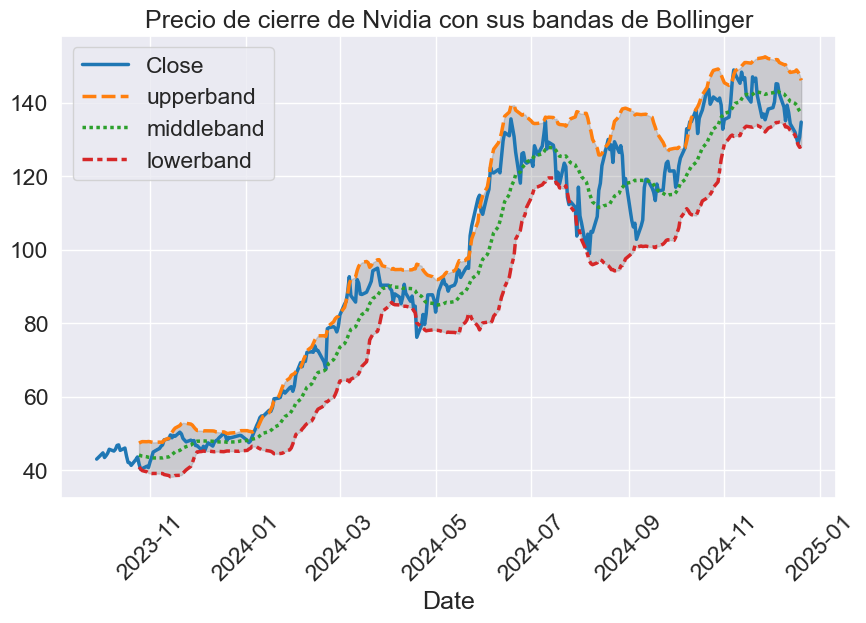

In [121]:
# Calculamos el RSI con talib
nvda["upperband"], nvda["middleband"], nvda["lowerband"] = ta.BBANDS(nvda["Close"],
                                                            timeperiod = 20, # Número de periodos
                                                            nbdevup = 2, # Número de desviaciones estándar para la banda superior
                                                            nbdevdn = 2, # Número de desviaciones estándar para la banda inferior
                                                            matype = 0 # Tipo de media móvil (0 = simple, 1 = exponencial, 2 = ponderada)
                                                            )

# Gráficamos el precio de cierre
sns.lineplot(data=nvda[["Close", "upperband", "middleband", "lowerband"]],
              linewidth=2.5) # Grosor de la línea
plt.fill_between(nvda.index, nvda['upperband'], nvda['lowerband'], color='gray', alpha=0.3)
plt.title("Precio de cierre de Nvidia con sus bandas de Bollinger")
plt.gcf().set_size_inches(10, 6)
plt.xticks(rotation=45)
plt.show()

## **RSI como indicador de momentum**

### RSI (Relative Strength index) sirve para medir la fuerza y rápidez de las subidas o bajadas de los precios de un acción en concreto. De modo que detecta las condiciones de sobrevaloración o subvaloración del activo. En otras palabras: compara la fortaleza de un valor en los días en que los precios suben con su fortaleza en los días en que los precios bajan. Relacionar el resultado de esta comparación con la acción del precio puede dar a los operadores una idea de cómo puede comportarse un valor.

### **Interpretación** 

### Oscila entre 0 y 100, siendo 70 el nivel de sobrecompra y 30 el de sobreventa. Cuando el RSI está por encima de 70, sugiere que el activo está subiendo demasiado rápido y podría experimentar una corrección a la baja. Por el contrario, cuando está por debajo de 30, indica que el activo está bajando demasiado rápido y podría estar listo para una recuperación.

### El RSI se calcula como sigue:

$$
\LARGE
{\text{RSI}(n)} = 100 - \frac {100}{1+ {\text{RS}}}
$$
### Dónde:

$$
\LARGE
\text{RS} = \frac{\text{Promedio de ganancias}}{\text{Promedio de pérdidas}}
$$

### ¡Momento de usar Python!

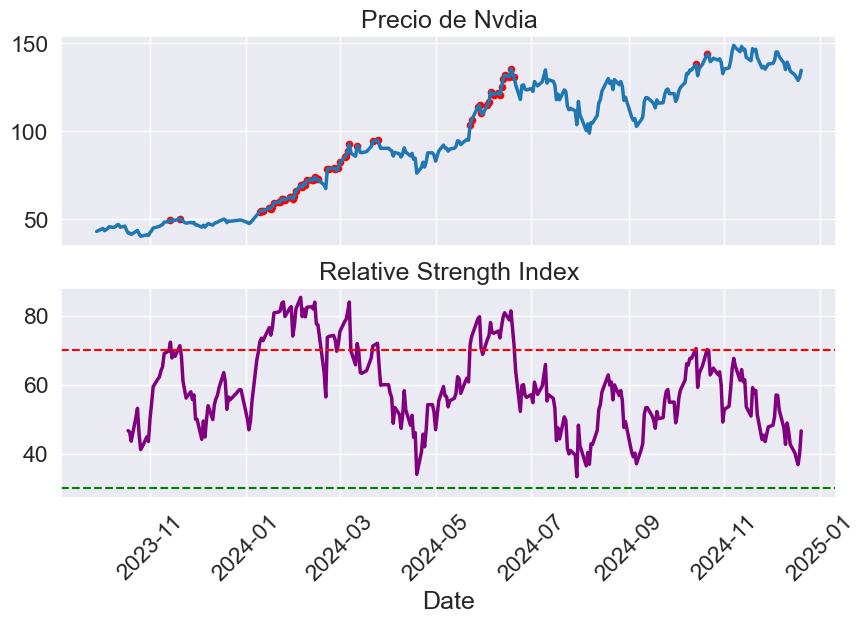

In [122]:
# Se calcula el RSI en base a 14 días
nvda["rsi"] = ta.RSI(nvda["Close"],
                      timeperiod= 14) # Número de periodos

# Se grafica el RSI

fig, axs = plt.subplots( ncols= 1, nrows= 2,
                        figsize=(2, 8), # Relación de altura entre los dos gráficos
                        sharex= True,) # Compartir el eje x

sns.lineplot(data=nvda[["Close"]],
              ax=axs[0],
              linewidth=2.5) # Grosor de la línea
axs[0].set_title("Precio de Nvdia")


sns.lineplot(data=nvda[["rsi"]],
              ax=axs[1],
              linewidth=2.5) 
axs[1].set_title("Relative Strength Index")
axs[1].lines[0].set_color("purple")
axs[1].axhline(70, color="red", linestyle="--")
axs[1].axhline(30, color="green", linestyle="--")

# Añadimos puntos en la primera gráfica cuando el RSI este por encima de 70 y por debajo de 30

above_70 = nvda[nvda["rsi"] > 70]
axs[0].scatter(above_70.index, above_70["Close"], color = "red", label = "RSI > 70", s= 20 )

below_30 = nvda[nvda['rsi'] < 30]
axs[0].scatter(below_30.index, below_30['Close'], color='green', label='RSI < 30', s=20)


# Modificaciones adicionales
axs[0].legend().remove()
axs[1].legend().remove()

plt.gcf().set_size_inches(10, 6)
plt.xticks(rotation=45)
plt.show()


#### ¡Y eso sería todo! Obviamente los indicadores técnicos no se utilizan por separado, se trabaja mejor usando varios a la vez. 

#### Por último, quisiera dejarles una serie de links, a modo de bibliografía. Siempre tengo presente una frase de Newton: "Si he logrado ver más lejos, ha sido porque he subido a hombros de gigantes." Por lo que les comparto de donde saqué la información de fórmulas, códigos y demás cosas que he usado en este post.

https://mayerkrebs.com/relative-strength-index-rsi-in-python/

https://www.disnat.com/en/learning/trading-basics/technical-analysis/the-relative-strength-index-rsi

https://medium.com/@financial_python/how-to-plot-bollinger-bands-in-python-1d7cc95ad9af

https://www.montartuempresa.com/wp-content/uploads/2015/10/manual_analisis_tecnico_w.pdf

https://www.expansion.com/diccionario-economico/indicador-tecnico.html

https://www.rankia.com/blog/sistemas-de-trading/6448754-bandas-bollinger-que-son-como-usan-trading

https://www.bancosantander.es/glosario/rsi-o-indice-de-fuerza-relativa

https://www.youtube.com/watch?v=1lkpW0Retmc&list=PL9-npOaAMXaRs75YPBemz3t--1Zf3f7yn&index=24

https://medium.com/@BDPO/unlock-the-power-of-technical-analysis-with-rsi-and-plotly-a-comprehensive-guide-for-traders-2f209faf5cbf

https://www.alpharithms.com/bollinger-bands-590615/

https://www.rankia.com/blog/bolsa-desde-cero/4458958-como-utiliza-rsi





